In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model


In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))


In [5]:
# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [6]:
# Clip the values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [7]:
# Build the denoising autoencoder model
input_img = Input(shape=(28 * 28,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(28 * 28, activation='sigmoid')(encoded)


In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [9]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3156 - val_loss: 0.1672
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1591 - val_loss: 0.1385
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1362 - val_loss: 0.1271
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1263 - val_loss: 0.1214
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1211 - val_loss: 0.1180
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1176 - val_loss: 0.1156
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1151 - val_loss: 0.1140
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1137 - val_loss: 0.1128
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1122 - val_loss: 0.1121
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1113 - val_loss: 0.1114
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1105 - val_loss: 0.1105
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
# Evaluate the model
decoded_imgs = autoencoder.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


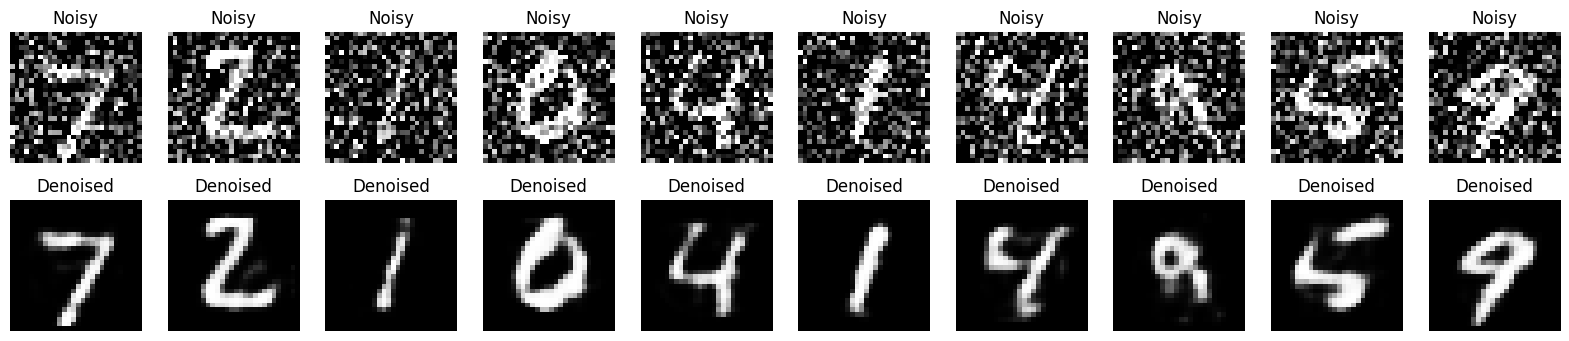

In [12]:
# Visualize the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()